In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [14]:
data = data.dropna()

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [15]:
split1 = int(len(data) * 0.6)
split2 = int(len(data) * 0.9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [16]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [17]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [18]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph from your model

In [19]:
import matplotlib.pyplot as plt

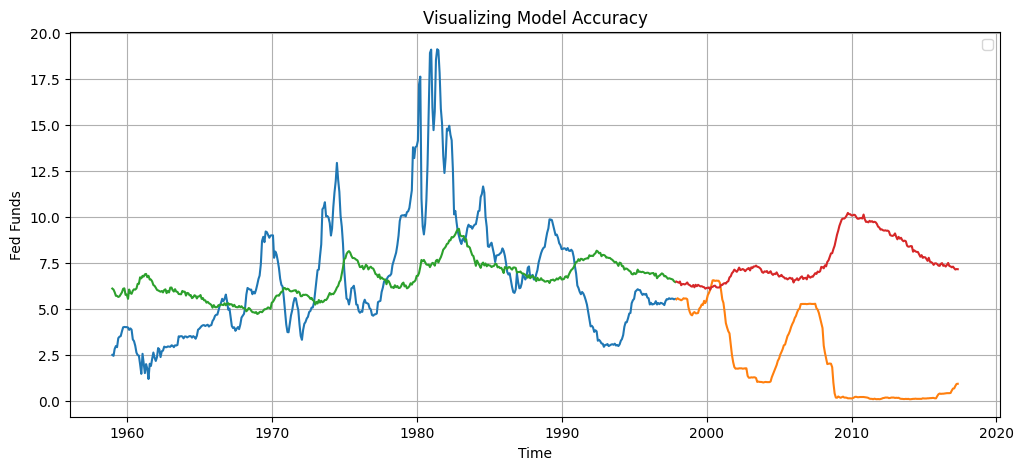

In [28]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [29]:
from sklearn.metrics import mean_squared_error

In [31]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [32]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.07142201316864
Outsample MSE :  40.3608278356673


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
maxdegrees = 3

DEGREES: 1


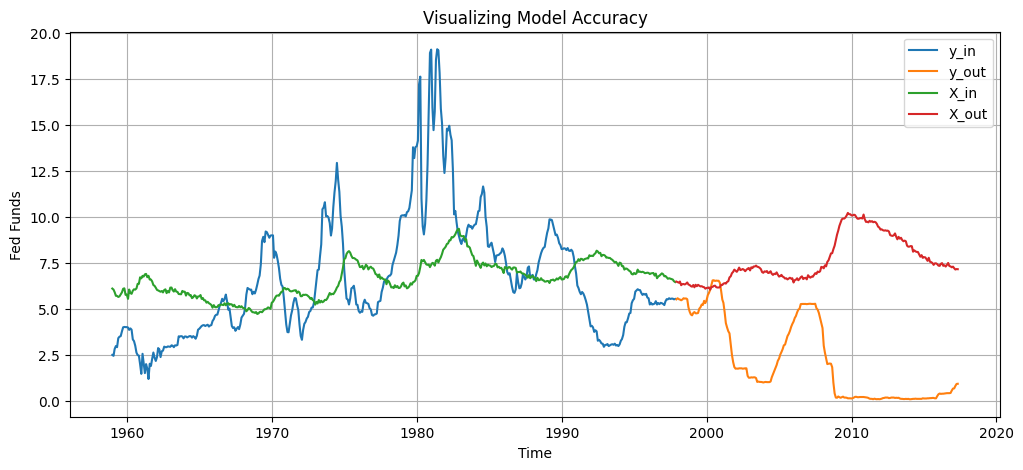

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566597
DEGREES: 2


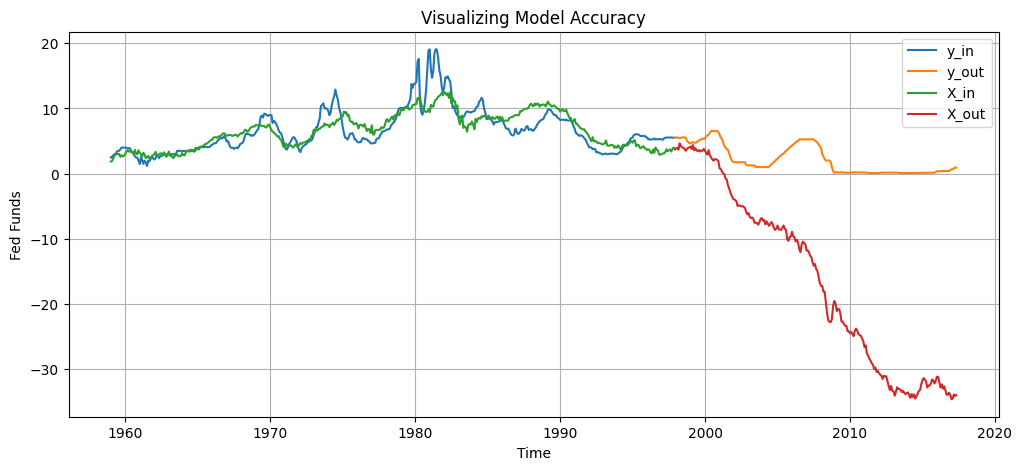

Insample MSE :  3.863477139276067
Outsample MSE :  481.44650991903114
DEGREES: 3


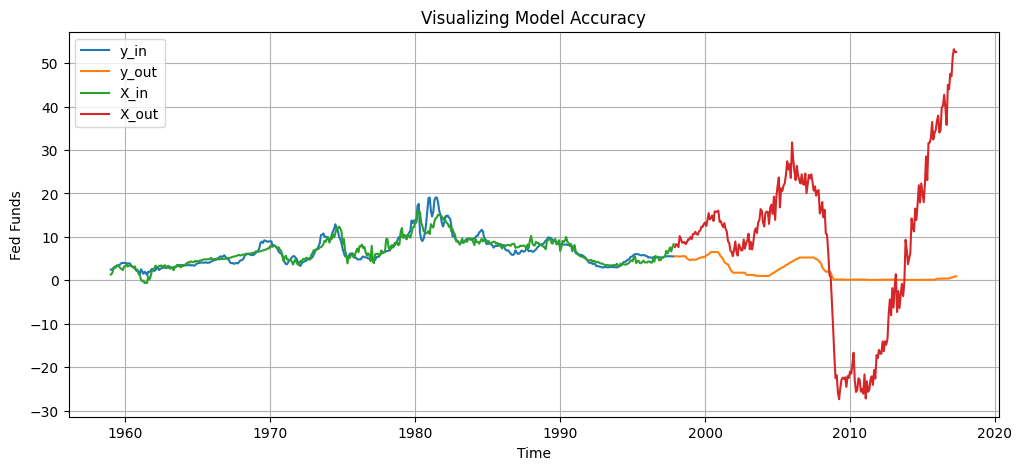

Insample MSE :  1.8723636267615362
Outsample MSE :  371.7677847482646


In [64]:
for degrees in range(1, maxdegrees + 1):
    print("DEGREES:", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    plt.figure(figsize = (12,5))
    
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(['y_in', 'y_out', 'X_in', 'X_out'])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly), y_out)
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

It looks like the model's predictions in the pred_out, or X_out, section are far less accurate than the pred_in, or X_in, section. This means the model is performing worse on data that it was not trained with, showing the model may not be robust. 